In [158]:
# importamos bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from matplotlib.ticker import FuncFormatter

### Primero vamos a representar gráficamente el efecto de la genética en el desarrollo del cáncer de pulmón

In [159]:
# Leemos primer archivo csv
factores_riesgo = pd.read_csv('./data/cancer-deaths-attributed-risk-factors.csv')
# Renombramos las columnas
factores_riesgo = factores_riesgo.rename(columns={'Entity'                                             : 'Tipo de cáncer', 
                                                          'Share of cancer deaths attributable to risk factors': 'Proporción de muertes por cáncer atribuidas a factores de riesgo 2019 (%)'})
# Redondeamos los valores de la columna 'Proporción de muertes por cáncer atribuidas a factores de riesgo 2019 (%)' a dos decimales
factores_riesgo['Proporción de muertes por cáncer atribuidas a factores de riesgo 2019 (%)'] = factores_riesgo['Proporción de muertes por cáncer atribuidas a factores de riesgo 2019 (%)'].round(2)

# Ordenamos el dataframe de mayor a menor según la columna 'Share of cancer deaths attributable to risk factors 2019 (%)'
factores_riesgo = factores_riesgo.sort_values(by='Proporción de muertes por cáncer atribuidas a factores de riesgo 2019 (%)', ascending=False)

# Quitamos el índice numérico del dataframe
factores_riesgo = factores_riesgo.reset_index(drop=True)

# Eliminamos las columnas que no van a servirnos
factores_riesgo = factores_riesgo.drop(columns=['Code', 'Year'])

factores_riesgo

,Tipo de cáncer,Proporción de muertes por cáncer atribuidas a factores de riesgo 2019 (%)
0,Cervical cancer,100.00
1,Mesothelioma,91.68
2,"Tracheal, bronchus, and lung cancer",80.29
3,Larynx cancer,70.90
4,Esophageal cancer,68.17
5,Lip and oral cavity cancer,62.19
6,Colon and rectum cancer,58.18
7,Liver cancer,52.56
8,Nasopharynx cancer,48.76
9,Bladder cancer,40.55


In [160]:
# Cargamos el segundo dataset para ver el porcentaje de muertes por tabaco en Europa
muertes_por_tabaco = pd.read_csv('./data/share_of_cancer_deaths_attributed_to_tobacco.csv')

# Renombramos las columnas para que sean más descriptivas
muertes_por_tabaco= muertes_por_tabaco.rename(columns={'Entity'                                                                                         : 'País',
                                                        'Year'                                                                                          : 'Año',
                                                        'Deaths - Cause: Neoplasms - Risk: Smoking - OWID - Sex: Both - Age: Age-standardized (Percent)': '% Muertes por cáncer atribuidas al tabaco en Europa',
                                                        })
# Eliminamos las columnas que no nos sirven
muertes_por_tabaco.drop('Code', axis=1, inplace=True)

# Sacamos los datos para la Región Europea
europa = muertes_por_tabaco[(muertes_por_tabaco['País'].isin(['European Region (WHO)']))]

#Eliminamos el índice que nos sale
europa = europa.reset_index(drop=True)

# Eliminamos la columna 'País' ya que los datos solo están para Europa
europa.drop('País', axis=1, inplace=True)

europa

,Año,% Muertes por cáncer atribuidas al tabaco en Europa
0,1990,31.35
1,1991,31.30
2,1992,31.30
3,1993,31.30
4,1994,31.22
5,1995,31.08
6,1996,30.81
7,1997,30.51
8,1998,30.25
9,1999,30.11


In [161]:
# Lo representamos mediante un gráfico de líneas

# Crear el gráfico de líneas
fig = px.line(europa, x="Año", y="% Muertes por cáncer atribuidas al tabaco en Europa",
              title="<b>Porcentaje de muertes por cáncer atribuidas al tabaco en Europa<b>",
              labels={"Año": "Año", "% Muertes por cáncer atribuidas al tabaco": ""},
              )

# Configurar el estilo de las líneas y los puntos
fig.update_traces(mode='lines+markers')


# Configurar la leyenda
fig.update_layout(legend=dict(title=None, orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
                  margin=dict(l=50, r=50, t=50, b=50), 
                  hovermode="x unified")

fig.update_yaxes(range=[0, 50])
# Mostrar el gráfico
fig.show()

In [162]:
# Ahora vamos a ver datos para España

# Cargamos el dataset con los datos muertes por tabaco en españa en 2012
cancer_relacion_tabaco = pd.read_csv('./data/los_cancer_de_laringe_y_pulmon_son_los_que_mas_relacionados_estan_con_el_tabaco.csv', sep=';')

# Nos quedamos con las filas que tienen datos
cancer_relacion_tabaco = cancer_relacion_tabaco.iloc[0:16]

# Eliminamos las columnas que no nos hacen falta
cancer_relacion_tabaco = cancer_relacion_tabaco.drop(columns=['Periodo', 'Año'])

# Renombramos las columnas para que sean más descriptivas
cancer_relacion_tabaco = cancer_relacion_tabaco.rename(columns={'Parámetro': 'Tipo de cáncer'})

# Ordenamos los valores de mayor a menor
cancer_relacion_tabaco = cancer_relacion_tabaco.sort_values(by='%', ascending=False)

# Reseteamos índice 
cancer_relacion_tabaco = cancer_relacion_tabaco.reset_index(drop=True)

cancer_relacion_tabaco

,Tipo de cáncer,%
0,Laringe,84.0
1,Pulmón,82.0
2,Vejiga,50.0
3,Orofaringe,49.0
4,Esófago,35.0
5,Cavidad bucal,33.0
6,Hígado,25.0
7,Estómago,21.0
8,Nasofaringe,17.0
9,Colon,14.0


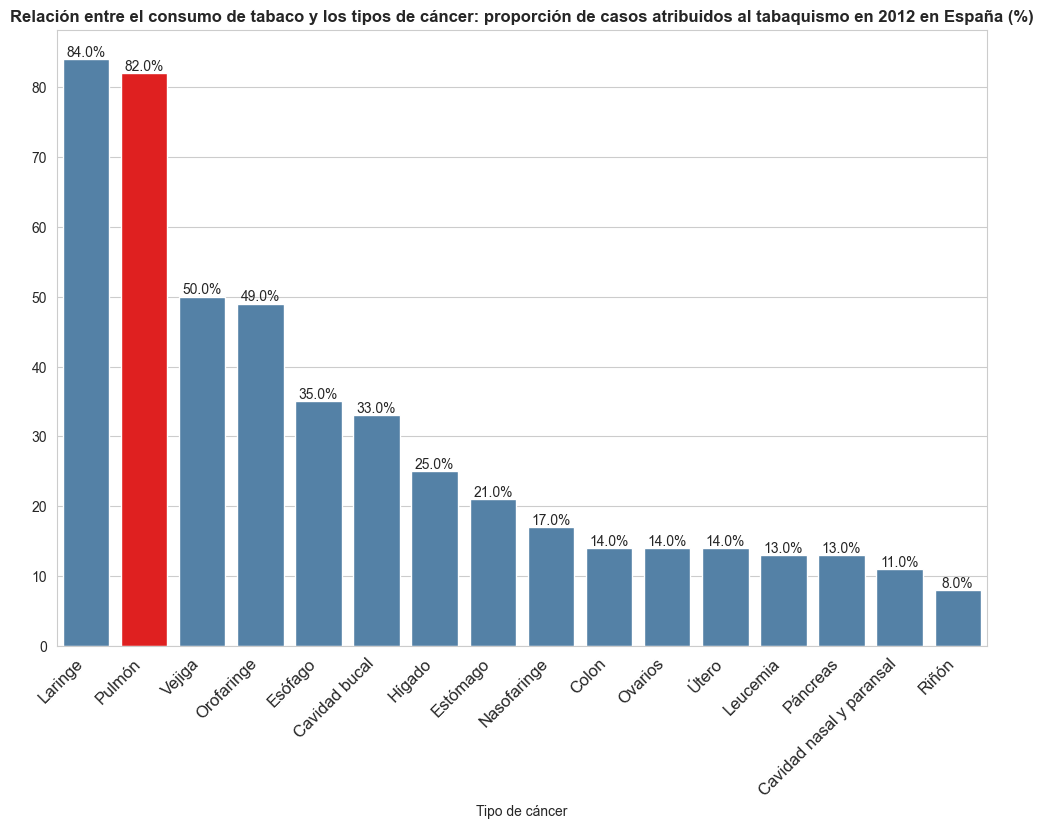

In [163]:
'''Hacemos visualización'''

# Crear el gráfico de barras con Seaborn
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='Tipo de cáncer', y='%', data=cancer_relacion_tabaco, ax=ax, palette=['steelblue' if x != 'Pulmón' else 'red' for x in cancer_relacion_tabaco['Tipo de cáncer']])

# Agregar la etiqueta del porcentaje al final de cada barra
for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=[f'{x:.1f}%' for x in i.datavalues], fontsize=10)

# Configurar las etiquetas de los ejes y el título del gráfico
ax.set_xlabel('Tipo de cáncer')
ax.set_ylabel('')
ax.set_title('Relación entre el consumo de tabaco y los tipos de cáncer: proporción de casos atribuidos al tabaquismo en 2012 en España (%)', fontweight='bold')
ax.tick_params(axis='x', labelsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

# Mostrar el gráfico
plt.show()

### Ahora vamos a representar gráficamente el efecto que tiene el cáncer de pulmón por países

In [164]:
# Leemos el archivo csv
muertes_tipos = pd.read_csv('./data/muertes_cancer_por_tipos.csv')

# Contamos nº de columnas
num_cols = len(muertes_tipos.columns) # 32 columnas
muertes_tipos.shape #(6840, 32)

# Están todos los datos, es decir, no hay datos nulos
muertes_tipos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 32 columns):
 #   Column                                                                                 Non-Null Count  Dtype 
---  ------                                                                                 --------------  ----- 
 0   Entity                                                                                 6840 non-null   object
 1   Code                                                                                   6150 non-null   object
 2   Year                                                                                   6840 non-null   int64 
 3   Deaths - Liver cancer - Sex: Both - Age: All Ages (Number)                             6840 non-null   int64 
 4   Deaths - Kidney cancer - Sex: Both - Age: All Ages (Number)                            6840 non-null   int64 
 5   Deaths - Lip and oral cavity cancer - Sex: Both - Age: All Ages (Number)           

In [165]:
muertes_tipos.head()

,Entity,Code,Year,Deaths - Liver cancer - Sex: Both - Age: All Ages (Number),Deaths - Kidney cancer - Sex: Both - Age: All Ages (Number),Deaths - Lip and oral cavity cancer - Sex: Both - Age: All Ages (Number),"Deaths - Tracheal, bronchus, and lung cancer - Sex: Both - Age: All Ages (Number)",Deaths - Larynx cancer - Sex: Both - Age: All Ages (Number),Deaths - Gallbladder and biliary tract cancer - Sex: Both - Age: All Ages (Number),Deaths - Malignant skin melanoma - Sex: Both - Age: All Ages (Number),...,Deaths - Brain and central nervous system cancer - Sex: Both - Age: All Ages (Number),Deaths - Non-Hodgkin lymphoma - Sex: Both - Age: All Ages (Number),Deaths - Pancreatic cancer - Sex: Both - Age: All Ages (Number),Deaths - Esophageal cancer - Sex: Both - Age: All Ages (Number),Deaths - Testicular cancer - Sex: Both - Age: All Ages (Number),Deaths - Nasopharynx cancer - Sex: Both - Age: All Ages (Number),Deaths - Other pharynx cancer - Sex: Both - Age: All Ages (Number),Deaths - Colon and rectum cancer - Sex: Both - Age: All Ages (Number),Deaths - Non-melanoma skin cancer - Sex: Both - Age: All Ages (Number),Deaths - Mesothelioma - Sex: Both - Age: All Ages (Number)
0,Afghanistan,AFG,1990,851,66,89,983,260,180,47,...,422,996,138,529,3,66,37,539,25,6
1,Afghanistan,AFG,1991,866,66,89,982,263,182,48,...,438,1010,137,535,4,67,37,542,26,7
2,Afghanistan,AFG,1992,890,68,91,989,268,185,51,...,472,1040,137,546,4,69,38,550,26,7
3,Afghanistan,AFG,1993,914,70,93,995,275,189,53,...,505,1062,139,560,5,72,39,555,27,7
4,Afghanistan,AFG,1994,933,71,94,996,282,193,54,...,526,1069,140,575,5,73,39,554,28,8


In [166]:
# Hacemos Data Cleaning

# Eliminamos las columnas que no nos sirven y nos quedamos con los datos para los países del G20 y para los países de ingresos bajos del BM
muertes_tipos = muertes_tipos[muertes_tipos['Entity'].isin(['G20', 'World Bank Low Income'])]
muertes_tipos.drop('Code', axis=1, inplace=True)

# Renombramos las columnas
muertes_tipos.rename(
    columns = {
        'Entity': 'País',
        'Year': 'Año',
        'Deaths - Liver cancer - Sex: Both - Age: All Ages (Number)'                            : 'Cáncer de Hígado',
        'Deaths - Kidney cancer - Sex: Both - Age: All Ages (Number)'                           : 'Cáncer de Riñón',
        'Deaths - Lip and oral cavity cancer - Sex: Both - Age: All Ages (Number)'              : 'Cáncer de Labio y Cavidad Bucal',
        'Deaths - Tracheal, bronchus, and lung cancer - Sex: Both - Age: All Ages (Number)'     : 'Cáncer de Tráquea, Bronquios y Pulmón',
        'Deaths - Larynx cancer - Sex: Both - Age: All Ages (Number)'                           : 'Cáncer de Laringe',
        'Deaths - Gallbladder and biliary tract cancer - Sex: Both - Age: All Ages (Number)'    : 'Cáncer de Vesícula',
        'Deaths - Malignant skin melanoma - Sex: Both - Age: All Ages (Number)'                 : 'Melanoma',
        'Deaths - Leukemia - Sex: Both - Age: All Ages (Number)'                                : 'Leucemia',
        'Deaths - Hodgkin lymphoma - Sex: Both - Age: All Ages (Number)'                        : 'Linfoma de Hodgkin',
        'Deaths - Multiple myeloma - Sex: Both - Age: All Ages (Number)'                        : 'Mieloma múltiple',
        'Deaths - Other neoplasms - Sex: Both - Age: All Ages (Number)'                         : 'Otros tipos de Cáncer',
        'Deaths - Breast cancer - Sex: Both - Age: All Ages (Number)'                           : 'Cáncer de Mama',
        'Deaths - Prostate cancer - Sex: Both - Age: All Ages (Number)'                         : 'Cáncer de Próstata',
        'Deaths - Thyroid cancer - Sex: Both - Age: All Ages (Number)'                          : 'Cáncer de Tiroides',
        'Deaths - Stomach cancer - Sex: Both - Age: All Ages (Number)'                          : 'Cáncer de Estómago',
        'Deaths - Bladder cancer - Sex: Both - Age: All Ages (Number)'                          : 'Cáncer de Vejiga',
        'Deaths - Uterine cancer - Sex: Both - Age: All Ages (Number)'                          : 'Cáncer de Útero',
        'Deaths - Ovarian cancer - Sex: Both - Age: All Ages (Number)'                          : 'Cáncer de Ovario',
        'Deaths - Cervical cancer - Sex: Both - Age: All Ages (Number)'                         : 'Cáncer de Cuello de Útero',
        'Deaths - Brain and central nervous system cancer - Sex: Both - Age: All Ages (Number)' : 'Cáncer Cerebral',
        'Deaths - Non-Hodgkin lymphoma - Sex: Both - Age: All Ages (Number)'                    : 'Linfoma No Hodgkiniano',
        'Deaths - Pancreatic cancer - Sex: Both - Age: All Ages (Number)'                       : 'Cáncer de Páncreas',
        'Deaths - Esophageal cancer - Sex: Both - Age: All Ages (Number)'                       : 'Cáncer de Esófago',
        'Deaths - Testicular cancer - Sex: Both - Age: All Ages (Number)'                       : 'Cáncer de Testículo',
        'Deaths - Nasopharynx cancer - Sex: Both - Age: All Ages (Number)'                      : 'Cáncer de Nasofaringe',
        'Deaths - Other pharynx cancer - Sex: Both - Age: All Ages (Number)'                    : 'Otros Cánceres de Faringe',
        'Deaths - Colon and rectum cancer - Sex: Both - Age: All Ages (Number)'                 : 'Cáncer de Colon y Recto',
        'Deaths - Non-melanoma skin cancer - Sex: Both - Age: All Ages (Number)'                : 'Cáncer de Piel (No Melanoma)',
        'Deaths - Mesothelioma - Sex: Both - Age: All Ages (Number)'                            : 'Mesotelioma'   
    },
    inplace=True
)

# Reseteamos índice
muertes_tipos = muertes_tipos.reset_index(drop=True)

In [167]:
muertes_tipos.head()

,País,Año,Cáncer de Hígado,Cáncer de Riñón,Cáncer de Labio y Cavidad Bucal,"Cáncer de Tráquea, Bronquios y Pulmón",Cáncer de Laringe,Cáncer de Vesícula,Melanoma,Leucemia,...,Cáncer Cerebral,Linfoma No Hodgkiniano,Cáncer de Páncreas,Cáncer de Esófago,Cáncer de Testículo,Cáncer de Nasofaringe,Otros Cánceres de Faringe,Cáncer de Colon y Recto,Cáncer de Piel (No Melanoma),Mesotelioma
0,G20,1990,313452,59664,70432,891450,64840,75832,27198,193145,...,111413,98662,172093,272145,5463,41387,41399,429792,18508,13293
1,G20,1991,328819,61514,72013,909546,65842,76843,27842,194390,...,113394,101872,176907,279103,5450,41974,42517,438446,18874,13507
2,G20,1992,343680,63632,73595,930052,66640,77872,28668,195242,...,115292,105147,182141,285238,5448,42190,43615,448561,19340,13766
3,G20,1993,359430,66498,76294,963032,68507,79245,29851,197015,...,117826,109527,189981,292976,5469,42507,45214,464598,19858,14105
4,G20,1994,375234,68651,78504,984715,69546,80088,30768,199113,...,120361,113268,195153,297415,5532,42595,46528,474663,20251,14356


In [168]:
# No tenemos valores nulos para ninguna columna
print(muertes_tipos.isnull().any())

País                                     False
Año                                      False
Cáncer de Hígado                         False
Cáncer de Riñón                          False
Cáncer de Labio y Cavidad Bucal          False
Cáncer de Tráquea, Bronquios y Pulmón    False
Cáncer de Laringe                        False
Cáncer de Vesícula                       False
Melanoma                                 False
Leucemia                                 False
Linfoma de Hodgkin                       False
Mieloma múltiple                         False
Otros tipos de Cáncer                    False
Cáncer de Mama                           False
Cáncer de Próstata                       False
Cáncer de Tiroides                       False
Cáncer de Estómago                       False
Cáncer de Vejiga                         False
Cáncer de Útero                          False
Cáncer de Ovario                         False
Cáncer de Cuello de Útero                False
Cáncer Cerebr

In [169]:
muertes_tipos.describe()

,Año,Cáncer de Hígado,Cáncer de Riñón,Cáncer de Labio y Cavidad Bucal,"Cáncer de Tráquea, Bronquios y Pulmón",Cáncer de Laringe,Cáncer de Vesícula,Melanoma,Leucemia,Linfoma de Hodgkin,...,Cáncer Cerebral,Linfoma No Hodgkiniano,Cáncer de Páncreas,Cáncer de Esófago,Cáncer de Testículo,Cáncer de Nasofaringe,Otros Cánceres de Faringe,Cáncer de Colon y Recto,Cáncer de Piel (No Melanoma),Mesotelioma
count,60.000000,60.000000,60.000000,60.000000,6.000000e+01,60.000000,60.000000,60.000000,60.000000,60.00000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000,60.000000
mean,2004.500000,175978.516667,48010.116667,52909.833333,6.434415e+05,38449.750000,52343.883333,20146.400000,113924.316667,9334.00000,...,76181.450000,74513.266667,143612.416667,188354.716667,3180.100000,23520.233333,32013.00000,319305.266667,15118.066667,9601.483333
std,8.728484,166766.818507,48829.955028,51266.756054,6.493655e+05,35730.131786,51543.956941,19460.562686,97460.576379,7485.02075,...,72579.481177,70795.557734,150806.477333,174485.010823,2886.817858,21353.659269,32379.31492,320474.521386,15485.052857,9694.915682
min,1990.000000,9879.000000,1449.000000,3102.000000,1.658200e+04,2640.000000,2206.000000,1061.000000,15695.000000,1499.00000,...,4005.000000,5093.000000,2992.000000,13383.000000,217.000000,1919.000000,1102.00000,9985.000000,524.000000,303.000000
25%,1997.000000,13051.000000,2097.750000,4126.750000,2.234725e+04,3127.500000,2792.750000,1465.750000,17276.000000,1953.75000,...,5804.250000,6485.500000,4917.750000,17723.000000,321.250000,2306.500000,1477.00000,13965.750000,869.000000,391.000000
50%,2004.500000,148945.500000,31639.000000,38461.500000,4.628645e+05,34622.500000,39951.000000,14718.000000,106958.000000,8777.50000,...,59960.000000,54456.500000,90689.500000,148485.000000,2985.000000,22288.000000,21916.00000,226571.500000,9987.500000,6956.500000
75%,2012.000000,333899.500000,92093.750000,95958.500000,1.240668e+06,70869.750000,101549.000000,38038.750000,207407.000000,15843.25000,...,144177.750000,134648.000000,265777.750000,376988.000000,5844.750000,44079.250000,58439.25000,619508.000000,27593.750000,17833.000000
max,2019.000000,413569.000000,134386.000000,142059.000000,1.724691e+06,87573.000000,135244.000000,50806.000000,236367.000000,19544.00000,...,187122.000000,193421.000000,440508.000000,413638.000000,7108.000000,50512.000000,90910.00000,873128.000000,44018.000000,25521.000000


In [170]:
# Filtramos los datos por el año más reciente
muertes_2019 = muertes_tipos[muertes_tipos['Año'] == 2019]

# Seleccionamos los países del G20 por un lado y los de menores ingresos por otro lado
g20 = muertes_2019[muertes_2019['País'] == 'G20']
low_income = muertes_2019[muertes_2019['País'] == 'World Bank Low Income']

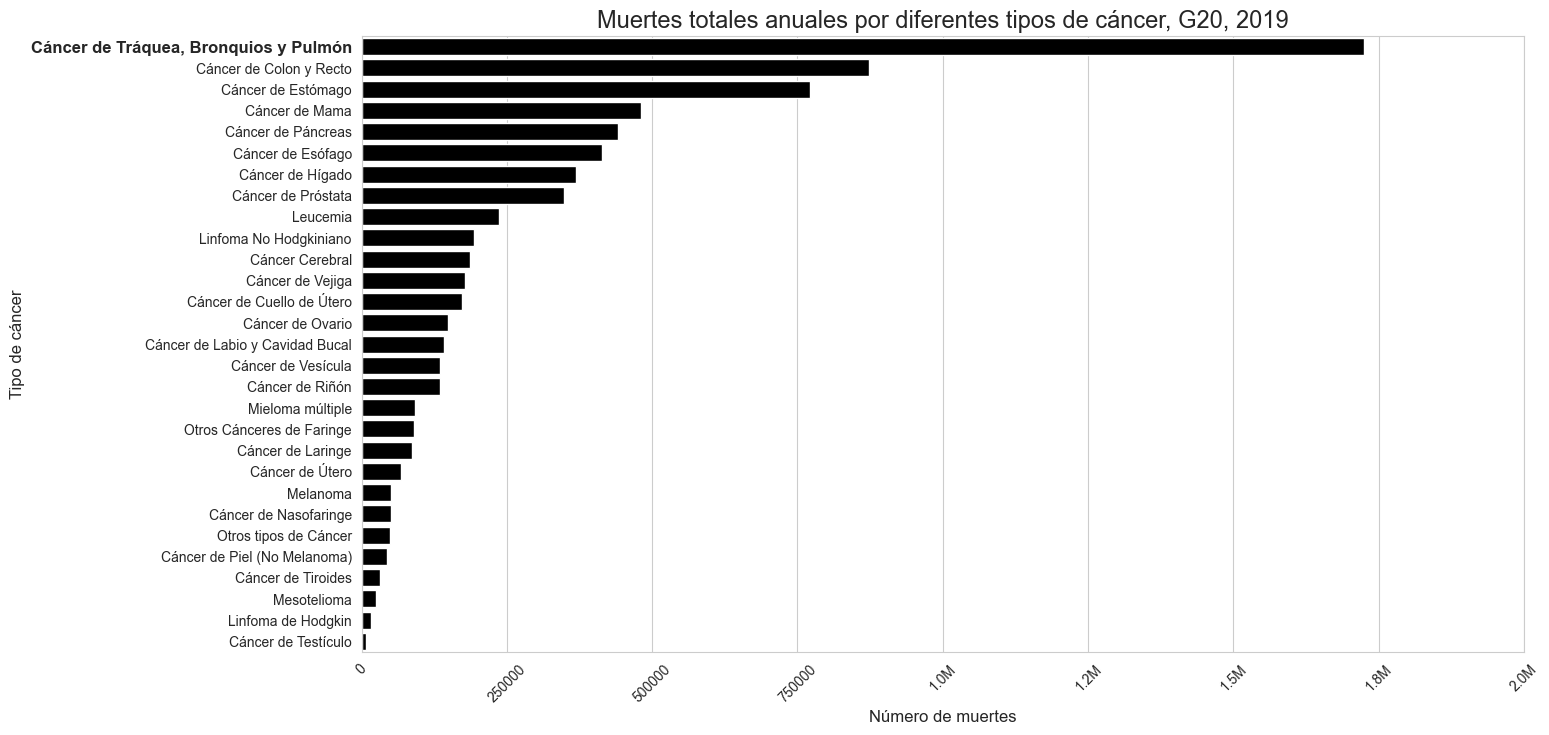

In [171]:
'''Hacemos visualización'''
# Gráfico de barras para los países del G20

plt.figure(figsize=(15,8))

sns.barplot(data=g20.drop(['Año', 'País'], axis=1).melt(var_name='Cáncer', value_name='Muertes'),
            x='Muertes', y='Cáncer', color='black',
            order=g20.drop(['Año', 'País'], axis=1).sum().sort_values(ascending=False).index
            )

# Formatear las etiquetas del eje x
def millions_formatter(x, pos):
    if x < 1000000:
        return '{:.0f}'.format(x)
    else:
        return '{:.1f}M'.format(x/1000000)

plt.gca().xaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.xlim(0, 2e6)

plt.title('Muertes totales anuales por diferentes tipos de cáncer, G20, 2019' , fontsize=17)
plt.xticks(rotation=45)
plt.xlabel('Número de muertes', fontsize=12)
plt.ylabel('Tipo de cáncer', fontsize=12)

# Poner en negrita la etiqueta del cáncer de tráquea, bronquios y pulmón
for i, label in enumerate(plt.gca().get_yticklabels()):
    if label.get_text() == "Cáncer de Tráquea, Bronquios y Pulmón":
        label.set_weight('bold')
        label.set_size(12)
    else:
        label.set_size(10)

plt.show()

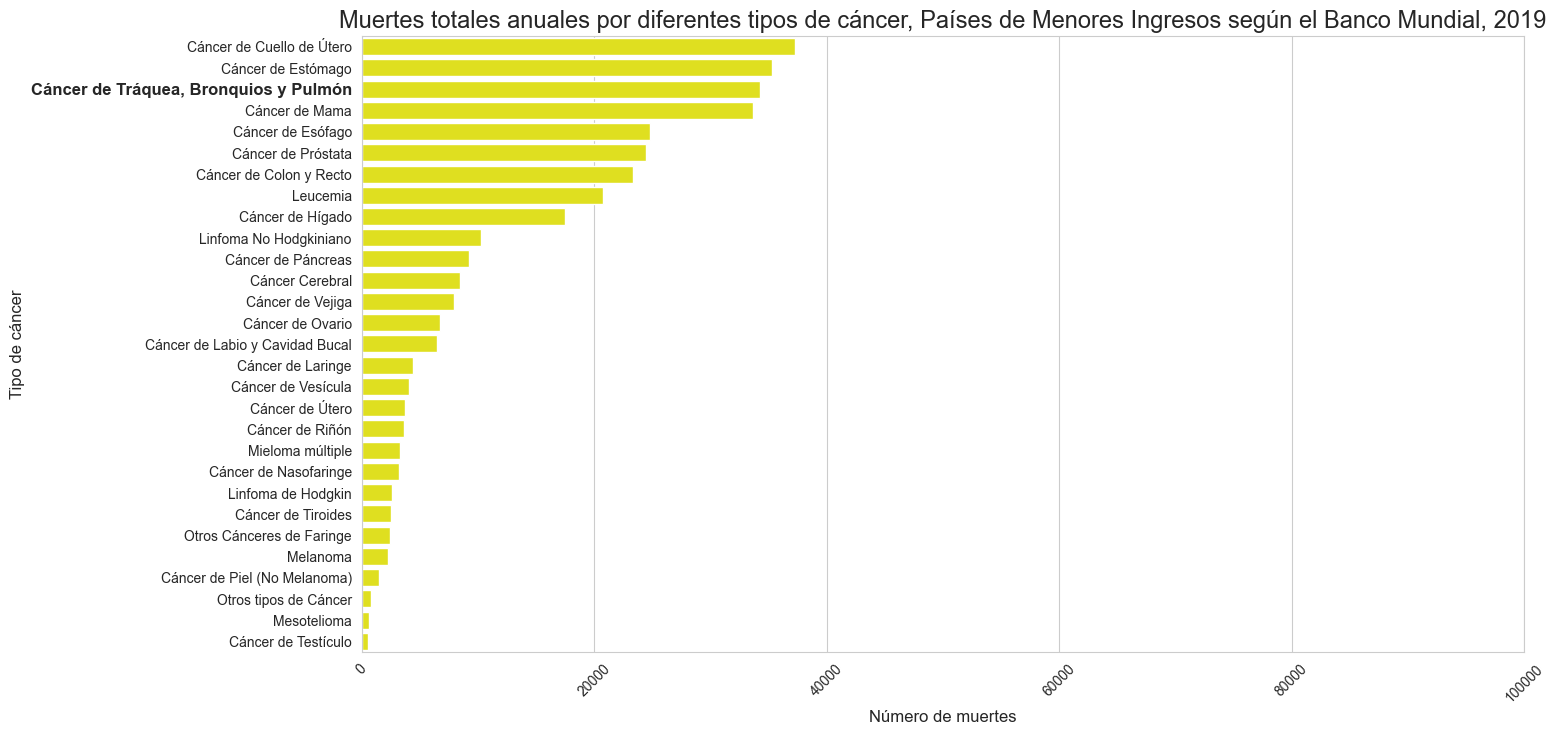

In [172]:
# Gráfico de barras para los países de bajos ingresos del Banco Mundial

plt.figure(figsize=(15,8))

sns.barplot(data=low_income.drop(['Año', 'País'], axis=1).melt(var_name='Cáncer', value_name='Muertes'),
            x='Muertes', y='Cáncer', color='yellow',
            order=low_income.drop(['Año', 'País'], axis=1).sum().sort_values(ascending=False).index
            )
    
    
# Formatear las etiquetas del eje x
def millions_formatter(x, pos):
    if x < 1000000:
        return '{:.0f}'.format(x)
    else:
        return '{:.1f}M'.format(x/1000000)

plt.gca().xaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.xlim(0, 100000)

plt.title('Muertes totales anuales por diferentes tipos de cáncer, Países de Menores Ingresos según el Banco Mundial, 2019' , fontsize=17)
plt.xticks(rotation=45)
plt.xlabel('Número de muertes', fontsize=12)
plt.ylabel('Tipo de cáncer', fontsize=12)

# Poner en negrita la etiqueta del cáncer de tráquea, bronquios y pulmón
for i, label in enumerate(plt.gca().get_yticklabels()):
    if label.get_text() == "Cáncer de Tráquea, Bronquios y Pulmón":
        label.set_weight('bold')
        label.set_size(12)
    else:
        label.set_size(10)

plt.show()

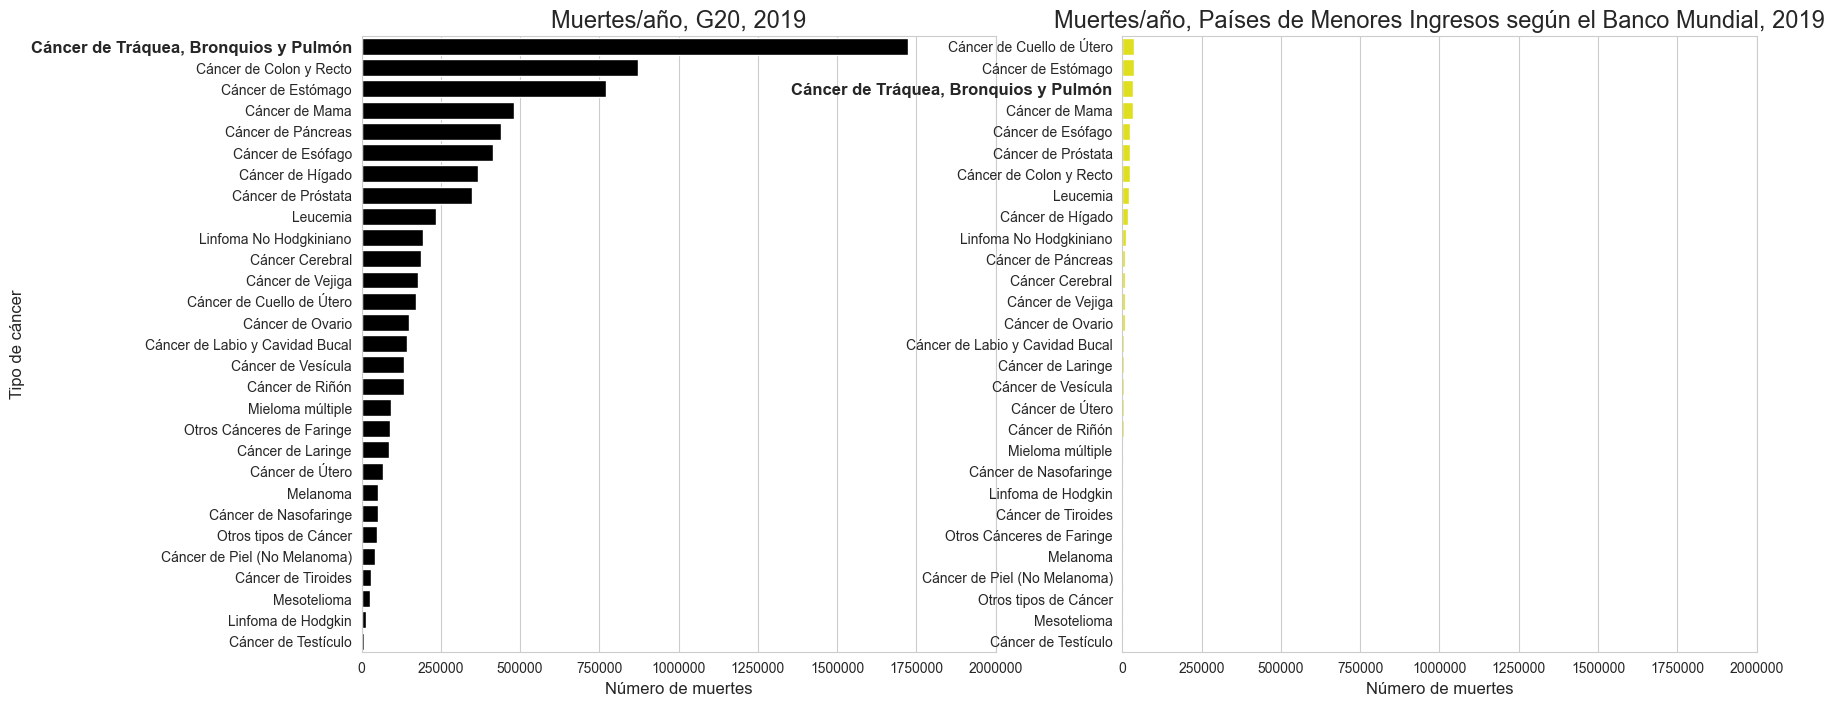

In [173]:
# Hacemos una comparativa entre los dos gráficos anteriores

fig, axs = plt.subplots(ncols=2, figsize=(18, 8), sharex=True)

# Graficar el primer subplot
sns.barplot(data=g20.drop(['Año', 'País'], axis=1).melt(var_name='Cáncer', value_name='Muertes'),
            x='Muertes', y='Cáncer', color='black',
            order=g20.drop(['Año', 'País'], axis=1).sum().sort_values(ascending=False).index,
            ax=axs[0])

axs[0].set_xlim(0, 2e6)
plt.ticklabel_format(style='plain', axis='x')
axs[0].set_title('Muertes/año, G20, 2019', fontsize=17)
axs[0].set_xlabel('Número de muertes', fontsize=12)
axs[0].set_ylabel('Tipo de cáncer', fontsize=12)

for label in axs[0].get_yticklabels():
    if label.get_text() == "Cáncer de Tráquea, Bronquios y Pulmón":
        label.set_weight('bold')
        label.set_size(12)
    else:
        label.set_size(10)

# Graficar el segundo subplot
sns.barplot(data=low_income.drop(['Año', 'País'], axis=1).melt(var_name='Cáncer', value_name='Muertes'),
            x='Muertes', y='Cáncer', color='yellow',
            order=low_income.drop(['Año', 'País'], axis=1).sum().sort_values(ascending=False).index,
            ax=axs[1])

axs[1].set_xlim(0, 2e6)
plt.ticklabel_format(style='plain', axis='x')
axs[1].set_title('Muertes/año, Países de Menores Ingresos según el Banco Mundial, 2019', fontsize=17)
axs[1].set_xlabel('Número de muertes', fontsize=12)
axs[1].set_ylabel('', fontsize=12)

for label in axs[1].get_yticklabels():
    if label.get_text() == "Cáncer de Tráquea, Bronquios y Pulmón":
        label.set_weight('bold')
        label.set_size(12)
    else:
        label.set_size(10)

plt.show()

In [174]:
'''Queremos ver el porcentaje de fumadores adultos para los países del G20 y para los países de bajos ingresos del Banco Mundial'''
# Hacemos una lista para los países del G20, ya que en ese dataset no aparece el G20 como un único valor

paises_g20 = ['European Union', 'Saudi Arabia', 'Argentina', 'Australia', 'Brazil', 'Canada', 'China', 'South Korea', 'United States', 
              'Japan', 'Mexico', 'United Kingdom', 'Russia', 'South Africa', 'Turkey']

paises_bajos_ingresos = ['Low income']

# Leemos el archivo csv
fumadores = pd.read_csv('./data/share-of-adults-who-smoke.csv')

# Nos quedamos con los países que aparecen en la lista del G20
fumadores_g20 = fumadores.loc[fumadores['Entity'].isin(paises_g20)]

# Eliminamos las columnas que no nos aportan nada
fumadores_g20 = fumadores_g20.drop('Code', axis=1)
fumadores_g20 = fumadores_g20.rename(columns={'Entity'                                          : 'País',
                                              'Year'                                            : 'Año',
                                              'Prevalence of current tobacco use (% of adults)' : 'Porcentaje de fumadores adultos'})
fumadores_g20 = fumadores_g20.reset_index(drop=True)
fumadores_g20

,País,Año,Porcentaje de fumadores adultos
0,Argentina,2000,34.000000
1,Argentina,2005,31.500000
2,Argentina,2010,28.900000
3,Argentina,2015,26.600000
4,Argentina,2018,24.900000
...,...,...,...
100,United States,2010,28.000000
101,United States,2015,25.299999
102,United States,2018,23.400000
103,United States,2019,23.400000


In [175]:
# Hacemos una lista para los países de bajos ingresos del Banco Mundial
fumadores_bajos_ingresos = fumadores.loc[fumadores['Entity'].isin(paises_bajos_ingresos)]

# Eliminamos las columnas que no nos aportan información
fumadores_bajos_ingresos = fumadores_bajos_ingresos.drop('Code', axis=1)
fumadores_bajos_ingresos = fumadores_bajos_ingresos.rename(columns={'Entity'                                         :'País',
                                                                    'Year'                                           :'Año',
                                                                    'Prevalence of current tobacco use (% of adults)':'Porcentaje de fumadores adultos'})
fumadores_bajos_ingresos

,País,Año,Porcentaje de fumadores adultos
644,Low income,2000,21.795908
645,Low income,2005,18.875574
646,Low income,2010,16.330761
647,Low income,2015,14.224798
648,Low income,2018,12.807217
649,Low income,2019,12.792043
650,Low income,2020,12.457701


In [176]:
# Hacemos la media para los países del G20
media_fumadores_g20 = fumadores_g20.groupby('Año')['Porcentaje de fumadores adultos'].mean().reset_index()

In [177]:
''' 
Hacemos visualización en un mismo gráfico para ver la comparación entre las dos variables
'''
# Gráfico de líneas para países del G20
trace1 = go.Scatter(x=media_fumadores_g20['Año'], y=media_fumadores_g20['Porcentaje de fumadores adultos'], mode='lines', name='Países del G20')

# Gráfico de líneas para países de bajos ingresos
trace2 = go.Scatter(x=fumadores_bajos_ingresos['Año'], y=fumadores_bajos_ingresos['Porcentaje de fumadores adultos'], mode='lines', name='Países de Bajos ingresos')

# Crear figura y agregar los gráficos
fig = go.Figure([trace1, trace2])

# Establecer título y etiquetas de los ejes
fig.update_layout(title='<b>Porcentaje de fumadores adultos (2000-2020)<b>',
                   xaxis_title='Año',
                   yaxis_title='Porcentaje de fumadores adultos')

# Mostrar el gráfico
fig.show()


In [178]:
# Ahora vamos a representar el porcentaje de muertes que se atribuyen al tabaco para ambos grupos de países

muertes_por_tabaco

,País,Año,% Muertes por cáncer atribuidas al tabaco en Europa
0,Afghanistan,1990,8.22
1,Afghanistan,1991,8.21
2,Afghanistan,1992,8.22
3,Afghanistan,1993,8.22
4,Afghanistan,1994,8.22
...,...,...,...
6835,Zimbabwe,2015,15.55
6836,Zimbabwe,2016,15.49
6837,Zimbabwe,2017,15.43
6838,Zimbabwe,2018,15.40


In [179]:
# Filtramos los datos por año y por los dos grupos de países que queremos
df_filtered = muertes_por_tabaco[(muertes_por_tabaco['Año'] >= 2000) & 
                                 (muertes_por_tabaco['Año'] <= 2019) & 
                                 (muertes_por_tabaco['País'].isin(['G20', 'World Bank Low Income']))]

# Crear el gráfico de líneas
fig = px.line(df_filtered, x="Año", y="% Muertes por cáncer atribuidas al tabaco en Europa", color="País")

# Configurar el título y los ejes
fig.update_layout(title="Porcentaje de muertes por cáncer atribuidas al tabaco",
                  xaxis_title="Año",
                  yaxis_title="")

# Mostrar el gráfico
fig.show()

### Por último, vamos a representar gráficamente la incidencia del desarrollo del cáncer de pulmón por género en los países de altos ingresos que son donde el cáncer de pulmón tiene una mayor incidencia.

In [180]:
muertes_genero = pd.read_csv('./data/lung-cancer-deaths-per-100000-by-sex-1950-2002.csv')

# Hacemos una lista de todos los países que queremos eliminar, ya que queremos quedarnos con los países de la UE
countries_to_remove = ['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Azerbaijan', 'Bahamas', 'Bahrain',
                       'Barbados', 'Belarus', 'Belize','Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Canada','Cape Verde', 'Chile', 
                       'Colombia', 'Costa Rica', 'Cuba', 'Czechia', 'Dominican Republic', 'Ecuador','Egypt', 'El Salvador', 'Fiji',
                       'French Guiana', 'Georgia', 'Grenada','Guadeloupe', 'Guatemala', 'Guyana', 'Hong Kong', 'Iceland', 'Iran', 'Iraq',
                       'Israel','Jamaica','Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Lebanon', 'Maldives', 'Malta',
                       'Martinique', 'Mauritius', 'Mayotte', 'Mexico', 'Moldova', 'Mongolia', 'Montenegro', 'New Zealand',
                       'Nicaragua', 'North Macedonia', 'Norway', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Puerto Rico','Reunion',
                       'Russia', 'Saint Lucia','Saint Vincent and the Grenadines', 'Sao Tome and Principe','Serbia', 'Seychelles', 'Singapore',
                       'South Africa', 'South Korea','Sri Lanka', 'Suriname','Syria', 'Tajikistan', 'Thailand','Trinidad and Tobago', 'Turkey',
                       'Turkmenistan', 'Ukraine', 'United States', 'Uruguay', 'Uzbekistan','Venezuela']

muertes_genero = muertes_genero[~muertes_genero['Entity'].isin(countries_to_remove)]

# Eliminamos las colunmas que no queremos
muertes_genero = muertes_genero.drop('Code', axis=1)

# Vamos a renombrar las columnas para que sean más descriptivas
muertes_genero = muertes_genero.rename(columns={'Entity'                                     :'País',
                                                'Year'                                       :'Año',
                                                'age-standardized_death_rate_per_100k_male'  :'Muertes Hombres/100k',
                                                'age-standardized_death_rate_per_100k_female':'Muertes Mujeres/100k'})

min_max_muertes = muertes_genero.groupby('País').agg({'Año'                     :['min', 'max'], 
                                                      'Muertes Hombres/100k'    : ['first', 'last'],
                                                      'Muertes Mujeres/100k'    : ['first', 'last']})

min_max_muertes.columns = ['1950', '2020','Muertes/Hombres(1950)', 'Muertes/Hombres(2020)', 'Muertes/Mujeres(1950)', 'Muertes/Mujeres(2020)']

muertes = pd.merge(muertes_genero, min_max_muertes, on="País")
muertes



# Establecemos Country como índice y eliminamos duplicados
muertes.set_index(['País','Año'], inplace=True)
muertes = muertes[~muertes.duplicated(keep='first')]
muertes

Muertes Hombres/100k  Muertes Mujeres/100k  1950  2020  \
País           Año                                                            
Austria        1955                 46.24                  5.64  1955  2020   
               1956                 49.07                  6.92  1955  2020   
               1957                 50.89                  6.96  1955  2020   
               1958                 51.36                  7.22  1955  2020   
               1959                 51.19                  7.06  1955  2020   
...                                   ...                   ...   ...   ...   
United Kingdom 2015                 31.76                 23.04  1950  2019   
               2016                 31.37                 22.58  1950  2019   
               2017                 29.82                 21.98  1950  2019   
               2018                 29.52                 21.89  1950  2019   
               2019                 27.81                 20.73  1950  2019   

                     Muertes/Hombres(1950)  Muertes/Hombres(2020)  \
País           Año                                                  
Austria        1955                  46.24                  28.04   
               1956                  46.24                  28.04   
               1957                  46.24                  28.04   
               1958                  46.24                  28.04   
               1959                  46.24                  28.04   
...                                    ...                    ...   
United Kingdom 2015                  40.79                  27.81   
               2016                  40.79                  27.81   
               2017                  40.79                  27.81   
               2018                  40.79                  27.81   
               2019                  40.79                  27.81   

                     Muertes/Mujeres(1950)  Muertes/Mujeres(2020)  
País           Año                                                 
Austria        1955                   5.64                  16.04  
               1956                   5.64                  16.04  
               1957                   5.64                  16.04  
               1958                   5.64                  16.04  
               1959                   5.64                  16.04  
...                                    ...                    ...  
United Kingdom 2015                   6.63                  20.73  
               2016                   6.63                  20.73  
               2017                   6.63                  20.73  
               2018                   6.63                  20.73  
               2019                   6.63                  20.73  

[1489 rows x 8 columns]

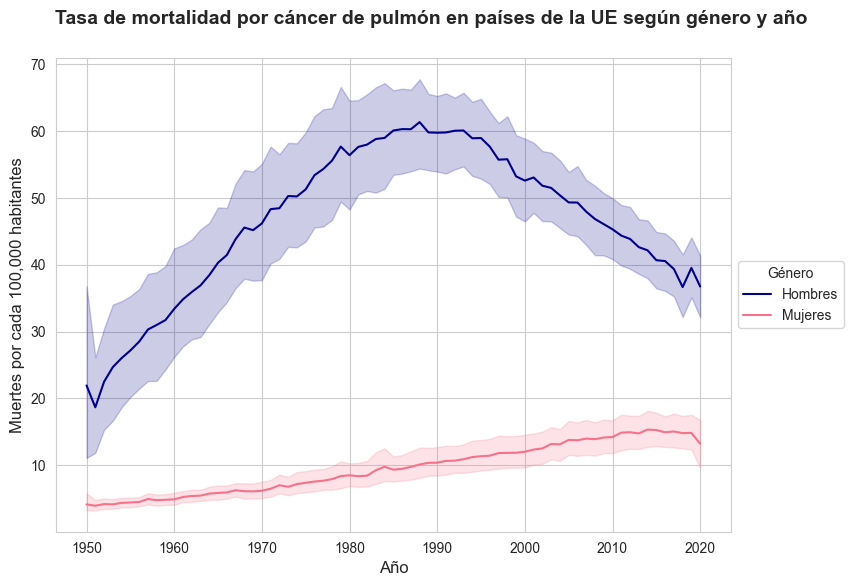

In [181]:
# Calculamos la media para cada año, género y país
muertes_media = muertes.groupby(['Año', 'País']).mean().reset_index()

# Graficamos la línea de tendencia para hombres y mujeres
sns.set_style('whitegrid')
sns.set_palette('husl')
sns.lineplot(data=muertes_media, x='Año', y='Muertes Hombres/100k', label='Hombres', color='darkblue')
sns.lineplot(data=muertes_media, x='Año', y='Muertes Mujeres/100k', label='Mujeres')

# Ajustamos los títulos de los gráficos y los ejes
plt.subplots_adjust(top=0.9, right=0.8)
plt.suptitle('Tasa de mortalidad por cáncer de pulmón en países de la UE según género y año', fontsize=14, fontweight='bold')
plt.xlabel('Año', fontsize=12)
plt.ylabel('Muertes por cada 100,000 habitantes', fontsize=12)

plt.legend(title='Género', fontsize=10, title_fontsize=10, loc='center left', bbox_to_anchor=(1, 0.5))
fig = plt.gcf()
fig.set_size_inches(10, 6)

plt.show()


In [182]:
'''Importamos los datos de ventas de cigarros'''

cigarros = pd.read_csv('./data/recent_cigarettes.csv')

# Me quedo con los países de la UE y UK
cigarros_remove = ['Australia', 'Canada', 'Georgia', 'Iceland', 'Japan', 'New Zealand', 'Norway', 'Russia', 'United States']
cigarros = cigarros[~cigarros['Country'].isin(cigarros_remove)]

# Renombramos las columnas para que sean más descriptivas
cigarros = cigarros.rename(columns={'Country'                              :'País',
                                    'Year'                                 :'Año',
                                    'Sales of cigarettes per adult per day':'Venta de cigarros por adulto y día'})
cigarros.reset_index(drop=True)

,País,Año,Venta de cigarros por adulto y día,1900,2014
0,Austria,1923,2.5,1923,2004
1,Austria,1924,2.9,1923,2004
2,Austria,1926,3.1,1923,2004
3,Austria,1927,3.3,1923,2004
4,Austria,1928,3.4,1923,2004
...,...,...,...,...,...
593,United Kingdom,2005,5.1,1905,2014
594,United Kingdom,2008,4.5,1905,2014
595,United Kingdom,2009,4.3,1905,2014
596,United Kingdom,2010,4.0,1905,2014


In [183]:
muertes_genero

,País,Año,Muertes Hombres/100k,Muertes Mujeres/100k
220,Austria,1955,46.24,5.64
221,Austria,1956,49.07,6.92
222,Austria,1957,50.89,6.96
223,Austria,1958,51.36,7.22
224,Austria,1959,51.19,7.06
...,...,...,...,...
4344,United Kingdom,2015,31.76,23.04
4345,United Kingdom,2016,31.37,22.58
4346,United Kingdom,2017,29.82,21.98
4347,United Kingdom,2018,29.52,21.89


In [184]:
# Unimos las dos tablas (muertes_genero, cigarros) por país y año.
pulmon_cigarros = muertes_genero.reset_index().merge(cigarros, on=['País', 'Año'], how='left')
#Eliminamos las filas con datos vacíos
pulmon_cigarros = pulmon_cigarros.dropna()
pulmon_cigarros = pulmon_cigarros.drop(columns=['index'])
pulmon_cigarros = pulmon_cigarros.drop(['1900', '2014'], axis=1)
pulmon_cigarros

,País,Año,Muertes Hombres/100k,Muertes Mujeres/100k,Venta de cigarros por adulto y día
1,Austria,1956,49.07,6.92,4.1
2,Austria,1957,50.89,6.96,4.3
3,Austria,1958,51.36,7.22,4.6
4,Austria,1959,51.19,7.06,4.7
5,Austria,1960,53.61,5.97,4.8
...,...,...,...,...,...
1474,United Kingdom,2005,40.14,23.00,5.1
1477,United Kingdom,2008,38.58,24.37,4.5
1478,United Kingdom,2009,37.54,23.70,4.3
1479,United Kingdom,2010,36.25,23.77,4.0


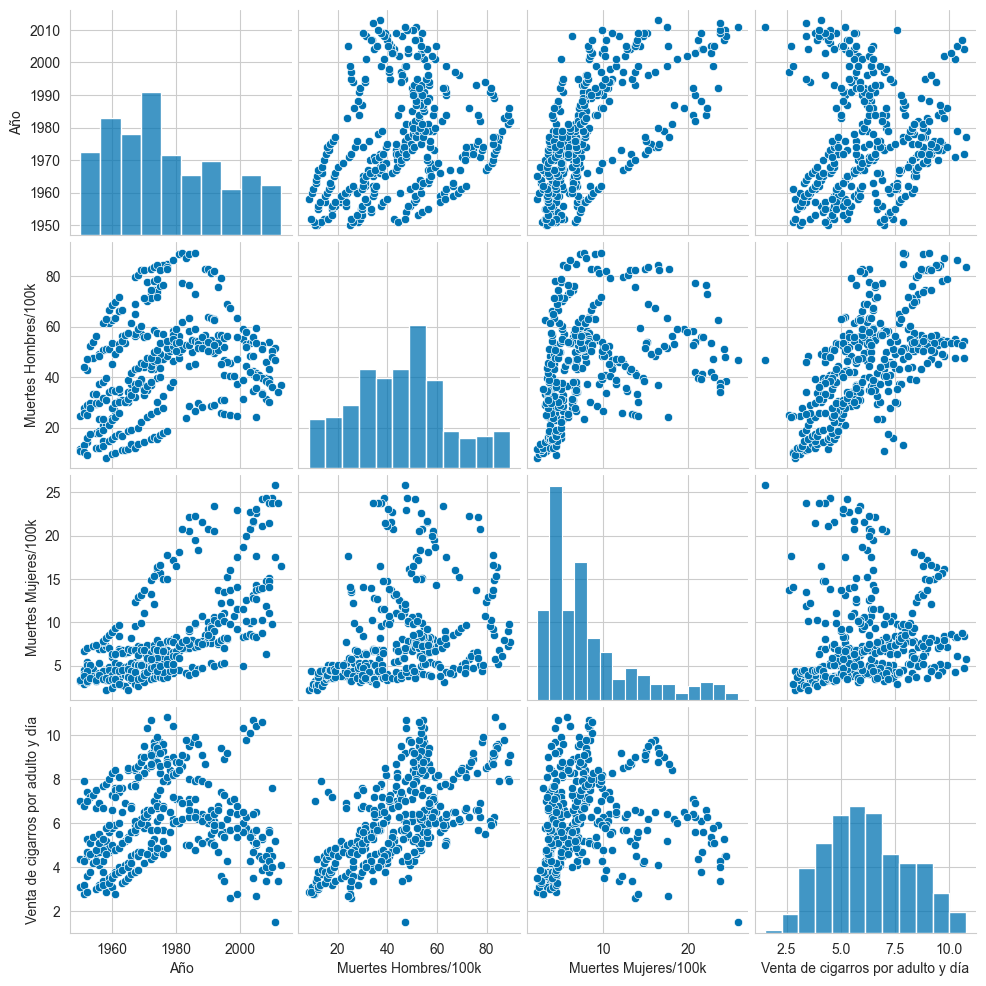

In [185]:
sns.set_palette('colorblind')
sns.pairplot(pulmon_cigarros)

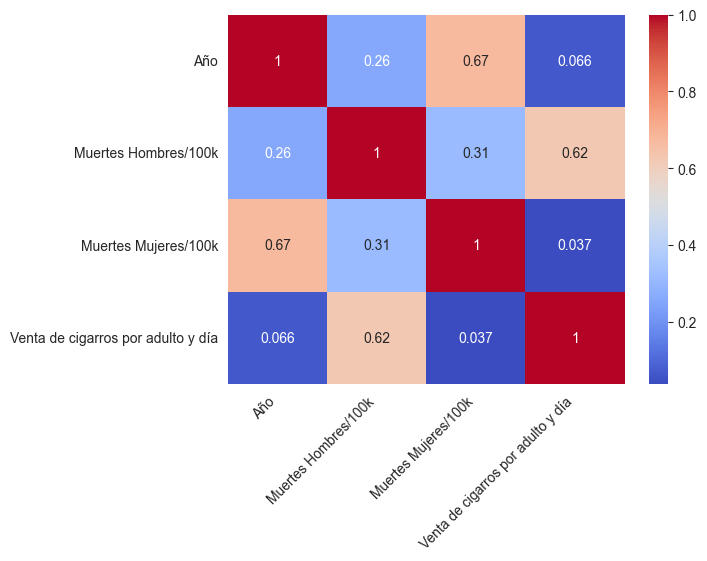

In [195]:
# Filtrar sólo los datos de hombres
pulmon_matrix = pulmon_cigarros[['País', 'Año', 'Muertes Hombres/100k', 'Muertes Mujeres/100k','Venta de cigarros por adulto y día']]

# Calcular la correlación entre las variables
corr_matrix = pulmon_matrix.corr()

# Graficar el heatmap con la correlación para hombres
ax = sns.heatmap(data=corr_matrix, cmap='coolwarm', annot=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('')
plt.show()


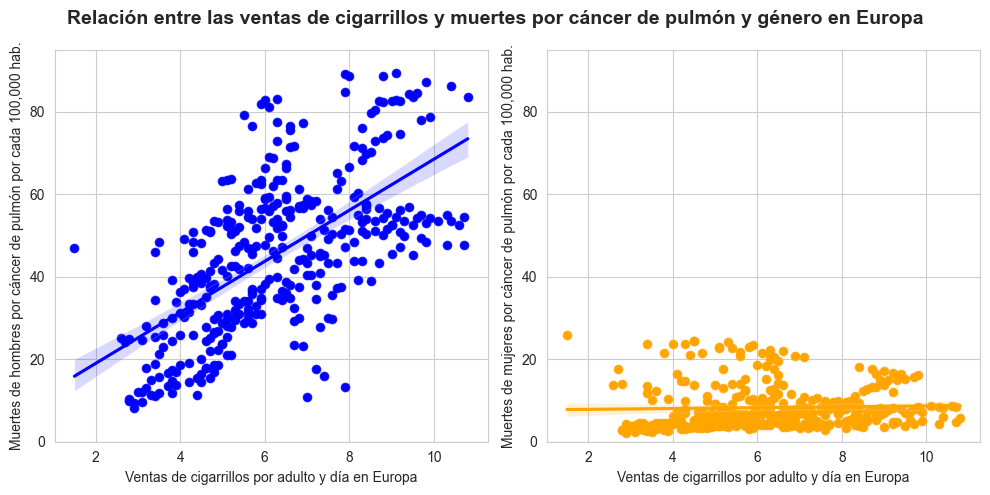

In [188]:
'''
Mostramos la correlación entre las ventas de cigarros en Europa por adulto y día con las muertes por cáncer de pulmón 
tanto en hombres como en mujeres.
'''
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

sns.scatterplot(data=pulmon_cigarros, x='Venta de cigarros por adulto y día', y='Muertes Hombres/100k', color='b', ax=ax1)
sns.regplot(data=pulmon_cigarros, x='Venta de cigarros por adulto y día', y='Muertes Hombres/100k', color='b', ax=ax1)

sns.scatterplot(data=pulmon_cigarros, x='Venta de cigarros por adulto y día', y='Muertes Mujeres/100k', color='orange', ax=ax2)
sns.regplot(data=pulmon_cigarros, x='Venta de cigarros por adulto y día', y='Muertes Mujeres/100k', color='orange', ax=ax2)

ax1.set_xlabel('Ventas de cigarrillos por adulto y día en Europa')
ax1.set_ylabel('Muertes de hombres por cáncer de pulmón por cada 100,000 hab.')
ax2.set_xlabel('Ventas de cigarrillos por adulto y día en Europa')
ax2.set_ylabel('Muertes de mujeres por cáncer de pulmón por cada 100,000 hab.')


ax1.set_ylim([0, 95])
ax2.set_ylim([0, 95])

plt.tight_layout()
fig.suptitle('Relación entre las ventas de cigarrillos y muertes por cáncer de pulmón y género en Europa', fontsize=14, fontweight='bold')
plt.subplots_adjust(top=0.9)
plt.show()

In [189]:
# Obtenemos los datos para España
spain_data = muertes.loc['Spain', ['Muertes Hombres/100k', 'Muertes Mujeres/100k']]
fig = go.Figure()

fig.add_trace(go.Scatter(x=spain_data.index, y=spain_data['Muertes Hombres/100k'], name='Men'))
fig.add_trace(go.Scatter(x=spain_data.index, y=spain_data['Muertes Mujeres/100k'], name='Women'))

fig.update_layout(title='<b>Muertes totales por cáncer de pulmón en España por cada 100,000 personas (1950-2020)<b>',
                  xaxis_title='Año',
                  yaxis_title='Muertes totales por cada 100,000 personas',
                  width=1000,
                  xaxis=dict(tickmode='linear', dtick=5),
                  yaxis_range=[0, 80])

In [196]:
# Porcentaje de fumadores habituales por sexo (hasta 2017)
tabaco_españa = pd.read_csv('./data/consumo_tabaco_españa_por_sexos.csv', sep=';')

# Cogemos los datos que nos reportan información
tabaco_españa = tabaco_españa.loc[0:8]

# Eliminamos las columnas que no nos aportan datos
tabaco_españa = tabaco_españa.drop('Periodo', axis=1)
# Reemplazamos las comas por puntos en las columnas Hombre y Mujer y convertimos las cadenas en valores numéricos
tabaco_españa['Hombre'] = tabaco_españa['Hombre'].str.replace(',', '.').astype(float)
tabaco_españa['Mujer'] = tabaco_españa['Mujer'].str.replace(',', '.').astype(float)
tabaco_españa['Año'] = tabaco_españa['Año'].astype(int)
tabaco_españa

,Año,Hombre,Mujer
0,1993,43.98,20.77
1,1995,43.50,24.51
2,1997,42.11,24.77
3,2001,39.21,24.65
4,2003,34.15,22.39
5,2006,31.56,21.51
6,2011,27.87,20.22
7,2014,27.57,18.60
8,2017,25.58,18.76


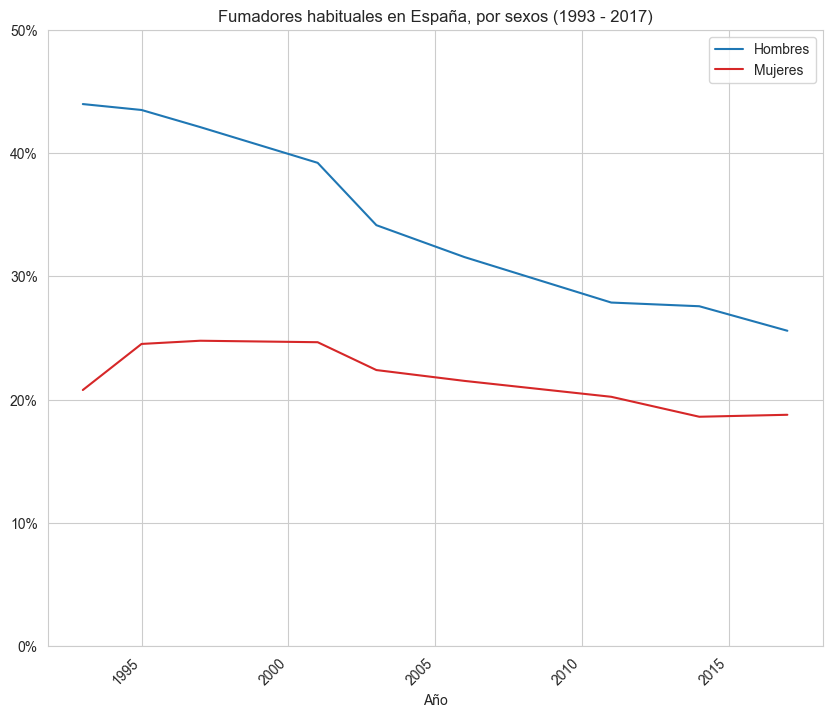

In [198]:
# Creamos gráfico de líneas
sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
sns.lineplot(x='Año', y='Hombre', data=tabaco_españa, color='#1f77b4', label='Hombres')
sns.lineplot(x='Año', y='Mujer', data=tabaco_españa, color='#d62728', label='Mujeres')
plt.xticks(rotation=45, ha='right')
plt.yticks(range(0, 60, 10), ['{}%'.format(x) for x in range(0, 60, 10)])
plt.xlabel('Año')
plt.ylabel('')
plt.title('Fumadores habituales en España, por sexos (1993 - 2017)')
plt.legend()

In [218]:
evolucion_tabaco = pd.read_csv('./data/evolucion_el_numero_de_usuarios_de_tabaco_a_nivel_mundial (2).csv', sep=';')


# Cogemos los datos que nos reportan información
evolucion_tabaco = evolucion_tabaco.loc[0:5]

# Eliminamos las columnas que no nos aportan datos
evolucion_tabaco = evolucion_tabaco.drop('Periodo', axis=1)
evolucion_tabaco = evolucion_tabaco.replace(',', '.', regex=True)
evolucion_tabaco = evolucion_tabaco.astype(float)
evolucion_tabaco

,Año,Ambos sexos,Hombres,Mujeres
0,2000.0,32.7,49.3,16.2
1,2005.0,29.5,45.7,13.4
2,2010.0,26.7,42.3,11.1
3,2015.0,24.4,39.5,9.3
4,2020.0,22.3,36.7,7.8
5,2025.0,20.4,34.3,6.6


In [219]:
fig = go.Figure()
fig.add_trace(go.Bar(x=evolucion_tabaco['Año'], y=evolucion_tabaco['Ambos sexos'], name='Ambos sexos'))
fig.add_trace(go.Bar(x=evolucion_tabaco['Año'], y=evolucion_tabaco['Hombres'], name='Hombres'))
fig.add_trace(go.Bar(x=evolucion_tabaco['Año'], y=evolucion_tabaco['Mujeres'], name='Mujeres'))

fig.update_layout(xaxis_title='Año',
yaxis_title='Número de usuarios de tabaco',
title='Evolución del número de usuarios de tabaco a nivel mundial y estimación para 2025',
barmode='group',
legend=dict(title='Sexo'))

fig.show()